In [1]:
"""
Pairwise evaluation. Simulated vs. OTA datasets.
"""

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import funcs
import jan
import coral
import star
import mcd
import dann
import base
import plots
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Load testbed data
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
file_path = "/home/ash/ic3/testbed_da/data"

# Classes in loaded npy files
class_subset = ["bpsk", "qpsk", "16qam", "16apsk"]

# simulated data
X_sim = np.load(file_path + "/sim_X.npy")
Y_sim = np.load(file_path + "/sim_Y.npy")

# over the air data
X_ota = np.load(file_path + "/ota_X.npy")
Y_ota = np.load(file_path + "/ota_Y.npy")

z_val = 10
sim_acc = []
ota_acc = []

for i in range(5):
    print(f'SNR level: {z_val}')
    # Filter for SNR level
    source_mask = (Y_sim[:, 1] == z_val+100)
    X_s = X_sim[source_mask]
    Y_s = Y_sim[source_mask]
    Y_s = Y_s[:,0]

    source_mask = (Y_ota[:, 1] == z_val)
    X_t = X_ota[source_mask]
    Y_t = Y_ota[source_mask]
    Y_t = Y_t[:,0]
    
    S_train_loader, S_val_loader = funcs.create_loader(X_s, Y_s, permute=False)
    T_train_loader, T_val_loader = funcs.create_loader(X_t, Y_t, permute=False)

    print('BASE')
    s_base, t_base = base.Base(model_cls=base.CLDNN, device=device, S_train_loader=S_train_loader, 
                    S_val_loader=S_val_loader, T_val_loader=T_val_loader, class_subset=class_subset, 
                    n_classes=len(class_subset), lr=0.005, n_epochs=25, n_runs=1).run()
    torch.cuda.empty_cache()
    sim_acc.append(s_base)
    ota_acc.append(t_base)

    z_val += 2


SNR level: 10
BASE

Run 1/1
Epoch 1/25, Train Loss: 1.4493, Train Acc: 0.3230, Val Loss: 0.8156, Val Acc: 0.5041
Epoch 2/25, Train Loss: 1.0508, Train Acc: 0.5094, Val Loss: 0.9846, Val Acc: 0.4944
Epoch 3/25, Train Loss: 0.8380, Train Acc: 0.5278, Val Loss: 0.6966, Val Acc: 0.6448
Epoch 4/25, Train Loss: 6.7140, Train Acc: 0.5820, Val Loss: 2.1880, Val Acc: 0.4944
Epoch 5/25, Train Loss: 2.0901, Train Acc: 0.6032, Val Loss: 1.5039, Val Acc: 0.5050
Epoch 6/25, Train Loss: 1.6411, Train Acc: 0.6707, Val Loss: 2.8817, Val Acc: 0.5047
Epoch 7/25, Train Loss: 1.4345, Train Acc: 0.6735, Val Loss: 0.7286, Val Acc: 0.6494
Epoch 8/25, Train Loss: 1.0286, Train Acc: 0.7610, Val Loss: 0.1606, Val Acc: 0.9399
Epoch 9/25, Train Loss: 0.6237, Train Acc: 0.8599, Val Loss: 0.0611, Val Acc: 0.9860
Epoch 10/25, Train Loss: 1.1902, Train Acc: 0.8028, Val Loss: 0.7775, Val Acc: 0.7943
Epoch 11/25, Train Loss: 0.0753, Train Acc: 0.9771, Val Loss: 0.0267, Val Acc: 0.9954
Epoch 12/25, Train Loss: 0.0309, Tr

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


BASE

Run 1/1
Epoch 1/25, Train Loss: 1.6957, Train Acc: 0.2449, Val Loss: 1.3916, Val Acc: 0.2487
Epoch 2/25, Train Loss: 1.3975, Train Acc: 0.2518, Val Loss: 1.4009, Val Acc: 0.2487
Epoch 3/25, Train Loss: 1.2986, Train Acc: 0.3344, Val Loss: 0.7358, Val Acc: 0.7638
Epoch 4/25, Train Loss: 1.3872, Train Acc: 0.6184, Val Loss: 0.4137, Val Acc: 0.8337
Epoch 5/25, Train Loss: 0.4409, Train Acc: 0.7354, Val Loss: 0.2211, Val Acc: 0.9268
Epoch 6/25, Train Loss: 0.3772, Train Acc: 0.7774, Val Loss: 0.7016, Val Acc: 0.6253
Epoch 7/25, Train Loss: 1.5475, Train Acc: 0.7058, Val Loss: 1.3932, Val Acc: 0.5575
Epoch 8/25, Train Loss: 1.0220, Train Acc: 0.7218, Val Loss: 0.0772, Val Acc: 0.9945
Epoch 9/25, Train Loss: 0.4299, Train Acc: 0.8884, Val Loss: 0.0038, Val Acc: 0.9994
Epoch 10/25, Train Loss: 0.2837, Train Acc: 0.9473, Val Loss: 0.0212, Val Acc: 0.9936
Epoch 11/25, Train Loss: 0.0030, Train Acc: 0.9995, Val Loss: 0.0047, Val Acc: 0.9991
Epoch 12/25, Train Loss: 0.0011, Train Acc: 0.999

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


BASE

Run 1/1
Epoch 1/25, Train Loss: 1.5122, Train Acc: 0.2457, Val Loss: 1.4298, Val Acc: 0.2429
Epoch 2/25, Train Loss: 1.4013, Train Acc: 0.2438, Val Loss: 1.3863, Val Acc: 0.2493
Epoch 3/25, Train Loss: 1.3918, Train Acc: 0.2486, Val Loss: 1.3883, Val Acc: 0.2606
Epoch 4/25, Train Loss: 1.3885, Train Acc: 0.2502, Val Loss: 1.3882, Val Acc: 0.2493
Epoch 5/25, Train Loss: 1.3885, Train Acc: 0.2435, Val Loss: 1.3894, Val Acc: 0.2472
Epoch 6/25, Train Loss: 1.3876, Train Acc: 0.2496, Val Loss: 1.3887, Val Acc: 0.2429
Epoch 7/25, Train Loss: 1.2881, Train Acc: 0.3778, Val Loss: 1.3454, Val Acc: 0.6918
Epoch 8/25, Train Loss: 0.5889, Train Acc: 0.7670, Val Loss: 0.1487, Val Acc: 0.9768
Epoch 9/25, Train Loss: 0.2124, Train Acc: 0.9080, Val Loss: 2.6452, Val Acc: 0.6900
Epoch 10/25, Train Loss: 0.9084, Train Acc: 0.7707, Val Loss: 1.9585, Val Acc: 0.7254
Epoch 11/25, Train Loss: 0.1590, Train Acc: 0.9602, Val Loss: 0.0088, Val Acc: 0.9994
Epoch 12/25, Train Loss: 0.0040, Train Acc: 0.999

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


BASE

Run 1/1
Epoch 1/25, Train Loss: 1.6157, Train Acc: 0.2464, Val Loss: 1.3910, Val Acc: 0.2548
Epoch 2/25, Train Loss: 1.4015, Train Acc: 0.2517, Val Loss: 1.3924, Val Acc: 0.2411
Epoch 3/25, Train Loss: 1.3913, Train Acc: 0.2485, Val Loss: 1.3885, Val Acc: 0.2493
Epoch 4/25, Train Loss: 1.3896, Train Acc: 0.2470, Val Loss: 1.3890, Val Acc: 0.2411
Epoch 5/25, Train Loss: 1.3885, Train Acc: 0.2483, Val Loss: 1.3876, Val Acc: 0.2548
Epoch 6/25, Train Loss: 1.3886, Train Acc: 0.2515, Val Loss: 1.3900, Val Acc: 0.2411
Epoch 7/25, Train Loss: 1.3883, Train Acc: 0.2502, Val Loss: 1.3866, Val Acc: 0.2493
Epoch 8/25, Train Loss: 1.3883, Train Acc: 0.2475, Val Loss: 1.3871, Val Acc: 0.2548
Epoch 9/25, Train Loss: 1.3879, Train Acc: 0.2461, Val Loss: 1.3885, Val Acc: 0.2411
Epoch 10/25, Train Loss: 1.3877, Train Acc: 0.2470, Val Loss: 1.3884, Val Acc: 0.2493
Epoch 11/25, Train Loss: 1.3869, Train Acc: 0.2474, Val Loss: 1.3868, Val Acc: 0.2411
Epoch 12/25, Train Loss: 1.3865, Train Acc: 0.240

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


BASE

Run 1/1
Epoch 1/25, Train Loss: 1.5280, Train Acc: 0.2458, Val Loss: 1.4116, Val Acc: 0.2521
Epoch 2/25, Train Loss: 1.4054, Train Acc: 0.2448, Val Loss: 1.4022, Val Acc: 0.2493
Epoch 3/25, Train Loss: 1.3943, Train Acc: 0.2380, Val Loss: 1.3873, Val Acc: 0.2521
Epoch 4/25, Train Loss: 1.3915, Train Acc: 0.2441, Val Loss: 1.3889, Val Acc: 0.2493
Epoch 5/25, Train Loss: 1.3888, Train Acc: 0.2513, Val Loss: 1.3871, Val Acc: 0.2450
Epoch 6/25, Train Loss: 1.3882, Train Acc: 0.2499, Val Loss: 1.3871, Val Acc: 0.2536
Epoch 7/25, Train Loss: 1.3875, Train Acc: 0.2492, Val Loss: 1.3865, Val Acc: 0.2521
Epoch 8/25, Train Loss: 1.3876, Train Acc: 0.2473, Val Loss: 1.3867, Val Acc: 0.2521
Epoch 9/25, Train Loss: 1.3878, Train Acc: 0.2480, Val Loss: 1.3874, Val Acc: 0.2450
Epoch 10/25, Train Loss: 1.3869, Train Acc: 0.2480, Val Loss: 1.3873, Val Acc: 0.2493
Epoch 11/25, Train Loss: 1.3871, Train Acc: 0.2469, Val Loss: 1.3864, Val Acc: 0.2493
Epoch 12/25, Train Loss: 1.3866, Train Acc: 0.245

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


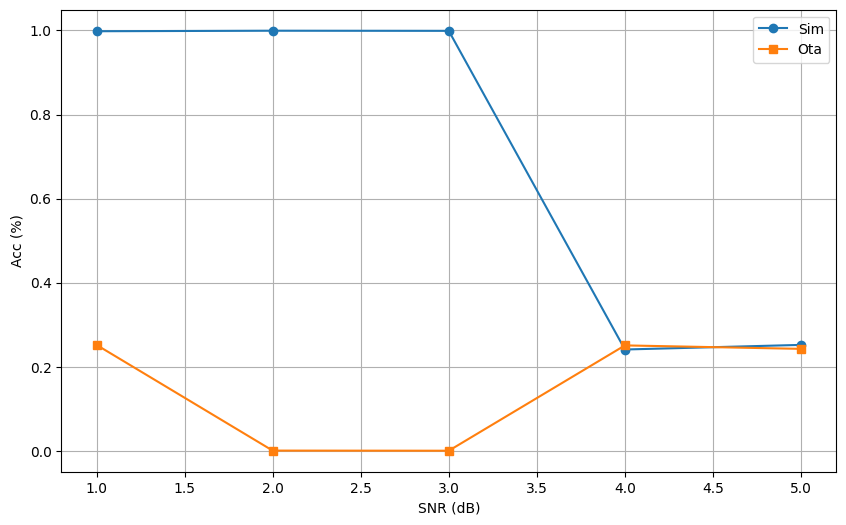

In [2]:



x = np.arange(1, 6)

plt.figure(figsize=(10, 6))
plt.plot(x, sim_acc, marker='o', linestyle='-', label='Sim')
plt.plot(x, ota_acc, marker='s', linestyle='-', label='Ota')


plt.xlabel('SNR (dB)')
plt.ylabel('Acc (%)')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# simulated data
X_sim = np.load(file_path + "/sim_X.npy")
Y_sim = np.load(file_path + "/sim_Y.npy")

# over the air data
X_ota = np.load(file_path + "/ota_X.npy")
Y_ota = np.load(file_path + "/ota_Y.npy")

z_val = 10
sim_acc = []
ota_acc = []

for i in range(5):
    source_mask = (Y_sim[:, 1] == z_val+100)
    X_s = X_sim[source_mask]
    Y_s = Y_sim[source_mask]
    Y_s = Y_s[:,0]

    source_mask = (Y_ota[:, 1] == z_val)
    X_t = X_ota[source_mask]
    Y_t = Y_ota[source_mask]
    Y_t = Y_t[:,0]

    S_train_loader, S_val_loader = funcs.create_loader(X_s, Y_s, permute=False)
    T_train_loader, T_val_loader = funcs.create_loader(X_t, Y_t, permute=False)
    
    print(f'SNR level: {z_val}')
    print('DANN')
    s_base, t_base = dann.DAN(dann.DANN, FA=dann.CLDNN_FA, LP=dann.CLDNN_LP, DC=dann.CLDNN_DC,
                      device=device, S_train_loader=S_train_loader, S_val_loader=S_val_loader,
                      T_train_loader=T_train_loader, T_val_loader=T_val_loader,
                      class_subset=class_subset, n_classes=len(class_subset), lr=0.005,
                      n_epochs=50, n_runs=5).run()
    torch.cuda.empty_cache()
    sim_acc.append(s_base)
    ota_acc.append(t_base)

    z_val += 2
    

SNR level: 10
DANN
Epoch 1/50, Loss: 3.8703, Domain Loss: 2.0127, Class Loss: 1.8576
Epoch 2/50, Loss: 2.7901, Domain Loss: 1.3955, Class Loss: 1.3946
Epoch 3/50, Loss: 2.7451, Domain Loss: 1.3913, Class Loss: 1.3537
Epoch 4/50, Loss: 2.7891, Domain Loss: 1.4014, Class Loss: 1.3877
Epoch 5/50, Loss: 4.1389, Domain Loss: 1.4511, Class Loss: 2.6878
Epoch 6/50, Loss: 7.1336, Domain Loss: 5.5820, Class Loss: 1.5516
Epoch 7/50, Loss: 15.3077, Domain Loss: 13.8827, Class Loss: 1.4250
Epoch 8/50, Loss: 3.2585, Domain Loss: 1.8667, Class Loss: 1.3918
Epoch 9/50, Loss: 2.7913, Domain Loss: 1.4014, Class Loss: 1.3899
Epoch 10/50, Loss: 2.7772, Domain Loss: 1.3878, Class Loss: 1.3894
Epoch 11/50, Loss: 2.7761, Domain Loss: 1.3870, Class Loss: 1.3891
Epoch 12/50, Loss: 2.7782, Domain Loss: 1.3872, Class Loss: 1.3910
Epoch 13/50, Loss: 2.7769, Domain Loss: 1.3873, Class Loss: 1.3896
Epoch 14/50, Loss: 2.7760, Domain Loss: 1.3875, Class Loss: 1.3885
Epoch 15/50, Loss: 2.7756, Domain Loss: 1.3880, Cl

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50, Loss: 4.1479, Domain Loss: 2.0850, Class Loss: 2.0628
Epoch 2/50, Loss: 2.7931, Domain Loss: 1.3891, Class Loss: 1.4039
Epoch 3/50, Loss: 2.7775, Domain Loss: 1.3868, Class Loss: 1.3907
Epoch 4/50, Loss: 2.7818, Domain Loss: 1.3923, Class Loss: 1.3895
Epoch 5/50, Loss: 2.7454, Domain Loss: 1.4054, Class Loss: 1.3400
Epoch 6/50, Loss: 18.2875, Domain Loss: 11.4430, Class Loss: 6.8445
Epoch 7/50, Loss: 18.1556, Domain Loss: 16.4391, Class Loss: 1.7165
Epoch 8/50, Loss: 5.6628, Domain Loss: 4.2624, Class Loss: 1.4003
Epoch 9/50, Loss: 2.9026, Domain Loss: 1.5142, Class Loss: 1.3883
Epoch 10/50, Loss: 2.8718, Domain Loss: 1.4839, Class Loss: 1.3879
Epoch 11/50, Loss: 2.7795, Domain Loss: 1.3913, Class Loss: 1.3882
Epoch 12/50, Loss: 2.7744, Domain Loss: 1.3866, Class Loss: 1.3878
Epoch 13/50, Loss: 2.7744, Domain Loss: 1.3865, Class Loss: 1.3879
Epoch 14/50, Loss: 2.7741, Domain Loss: 1.3866, Class Loss: 1.3875
Epoch 15/50, Loss: 2.7753, Domain Loss: 1.3868, Class Loss: 1.3884


/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50, Loss: 4.8051, Domain Loss: 2.8613, Class Loss: 1.9438
Epoch 2/50, Loss: 2.7909, Domain Loss: 1.3870, Class Loss: 1.4039
Epoch 3/50, Loss: 2.7129, Domain Loss: 1.3895, Class Loss: 1.3234
Epoch 4/50, Loss: 4.9431, Domain Loss: 3.5290, Class Loss: 1.4142
Epoch 5/50, Loss: 50.5410, Domain Loss: 40.7807, Class Loss: 9.7603
Epoch 6/50, Loss: 4.0701, Domain Loss: 2.6369, Class Loss: 1.4332
Epoch 7/50, Loss: 2.7821, Domain Loss: 1.3867, Class Loss: 1.3955
Epoch 8/50, Loss: 2.7782, Domain Loss: 1.3867, Class Loss: 1.3915
Epoch 9/50, Loss: 2.7816, Domain Loss: 1.3867, Class Loss: 1.3949
Epoch 10/50, Loss: 2.7799, Domain Loss: 1.3867, Class Loss: 1.3932
Epoch 11/50, Loss: 2.7770, Domain Loss: 1.3869, Class Loss: 1.3902
Epoch 12/50, Loss: 2.7814, Domain Loss: 1.3869, Class Loss: 1.3945
Epoch 13/50, Loss: 2.7820, Domain Loss: 1.3870, Class Loss: 1.3950
Epoch 14/50, Loss: 2.7769, Domain Loss: 1.3869, Class Loss: 1.3900
Epoch 15/50, Loss: 2.7796, Domain Loss: 1.3870, Class Loss: 1.3925
Ep

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50, Loss: 4.7349, Domain Loss: 2.6171, Class Loss: 2.1178
Epoch 2/50, Loss: 2.8034, Domain Loss: 1.3976, Class Loss: 1.4059
Epoch 3/50, Loss: 2.7784, Domain Loss: 1.3864, Class Loss: 1.3919
Epoch 4/50, Loss: 2.7554, Domain Loss: 1.3923, Class Loss: 1.3631
Epoch 5/50, Loss: 2.8451, Domain Loss: 1.3981, Class Loss: 1.4471
Epoch 6/50, Loss: 2.6828, Domain Loss: 1.4779, Class Loss: 1.2049
Epoch 7/50, Loss: 3.4183, Domain Loss: 1.4581, Class Loss: 1.9602
Epoch 8/50, Loss: 2.7737, Domain Loss: 1.3862, Class Loss: 1.3874
Epoch 9/50, Loss: 2.7500, Domain Loss: 1.3850, Class Loss: 1.3651
Epoch 10/50, Loss: 3.0634, Domain Loss: 1.4533, Class Loss: 1.6101
Epoch 11/50, Loss: 48.5863, Domain Loss: 46.5289, Class Loss: 2.0574
Epoch 12/50, Loss: 3.5142, Domain Loss: 1.9520, Class Loss: 1.5622
Epoch 13/50, Loss: 2.7823, Domain Loss: 1.3881, Class Loss: 1.3942
Epoch 14/50, Loss: 2.7746, Domain Loss: 1.3870, Class Loss: 1.3876
Epoch 15/50, Loss: 2.7724, Domain Loss: 1.3866, Class Loss: 1.3858
Ep

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50, Loss: 4.5405, Domain Loss: 2.3093, Class Loss: 2.2312
Epoch 2/50, Loss: 2.7863, Domain Loss: 1.3879, Class Loss: 1.3983
Epoch 3/50, Loss: 2.7817, Domain Loss: 1.3864, Class Loss: 1.3953
Epoch 4/50, Loss: 2.7400, Domain Loss: 1.3868, Class Loss: 1.3532
Epoch 5/50, Loss: 4.2234, Domain Loss: 2.7691, Class Loss: 1.4543
Epoch 6/50, Loss: 79.7388, Domain Loss: 74.7907, Class Loss: 4.9481
Epoch 7/50, Loss: 35.3417, Domain Loss: 33.8867, Class Loss: 1.4550
Epoch 8/50, Loss: 7.3592, Domain Loss: 5.9630, Class Loss: 1.3962
Epoch 9/50, Loss: 2.9739, Domain Loss: 1.5843, Class Loss: 1.3896
Epoch 10/50, Loss: 2.7902, Domain Loss: 1.3992, Class Loss: 1.3909
Epoch 11/50, Loss: 2.7760, Domain Loss: 1.3877, Class Loss: 1.3883
Epoch 12/50, Loss: 2.7768, Domain Loss: 1.3869, Class Loss: 1.3899
Epoch 13/50, Loss: 2.7768, Domain Loss: 1.3869, Class Loss: 1.3899
Epoch 14/50, Loss: 2.7775, Domain Loss: 1.3869, Class Loss: 1.3906
Epoch 15/50, Loss: 2.7774, Domain Loss: 1.3869, Class Loss: 1.3905


/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SNR level: 12
DANN
Epoch 1/50, Loss: 4.5788, Domain Loss: 2.3839, Class Loss: 2.1949
Epoch 2/50, Loss: 2.7932, Domain Loss: 1.3889, Class Loss: 1.4043
Epoch 3/50, Loss: 2.7895, Domain Loss: 1.3866, Class Loss: 1.4029
Epoch 4/50, Loss: 2.7827, Domain Loss: 1.3864, Class Loss: 1.3963
Epoch 5/50, Loss: 2.7806, Domain Loss: 1.3863, Class Loss: 1.3943
Epoch 6/50, Loss: 2.7785, Domain Loss: 1.3863, Class Loss: 1.3922
Epoch 7/50, Loss: 2.7793, Domain Loss: 1.3863, Class Loss: 1.3930
Epoch 8/50, Loss: 2.7763, Domain Loss: 1.3863, Class Loss: 1.3900
Epoch 9/50, Loss: 2.7772, Domain Loss: 1.3863, Class Loss: 1.3908
Epoch 10/50, Loss: 2.7870, Domain Loss: 1.3864, Class Loss: 1.4006
Epoch 11/50, Loss: 2.7794, Domain Loss: 1.3864, Class Loss: 1.3929
Epoch 12/50, Loss: 2.7777, Domain Loss: 1.3865, Class Loss: 1.3912
Epoch 13/50, Loss: 2.7772, Domain Loss: 1.3864, Class Loss: 1.3908
Epoch 14/50, Loss: 2.7752, Domain Loss: 1.3865, Class Loss: 1.3887
Epoch 15/50, Loss: 2.7741, Domain Loss: 1.3864, Clas

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50, Loss: 5.2971, Domain Loss: 2.6853, Class Loss: 2.6118
Epoch 2/50, Loss: 2.7891, Domain Loss: 1.3890, Class Loss: 1.4001
Epoch 3/50, Loss: 2.7807, Domain Loss: 1.3870, Class Loss: 1.3937
Epoch 4/50, Loss: 2.7884, Domain Loss: 1.3864, Class Loss: 1.4020
Epoch 5/50, Loss: 2.7801, Domain Loss: 1.3863, Class Loss: 1.3938
Epoch 6/50, Loss: 2.7775, Domain Loss: 1.3863, Class Loss: 1.3912
Epoch 7/50, Loss: 2.7740, Domain Loss: 1.3863, Class Loss: 1.3877
Epoch 8/50, Loss: 2.7755, Domain Loss: 1.3863, Class Loss: 1.3892
Epoch 9/50, Loss: 2.7755, Domain Loss: 1.3869, Class Loss: 1.3886
Epoch 10/50, Loss: 2.7818, Domain Loss: 1.3927, Class Loss: 1.3891
Epoch 11/50, Loss: 2.7754, Domain Loss: 1.3872, Class Loss: 1.3882
Epoch 12/50, Loss: 2.7721, Domain Loss: 1.4007, Class Loss: 1.3714
Epoch 13/50, Loss: 2.7963, Domain Loss: 1.3993, Class Loss: 1.3970
Epoch 14/50, Loss: 2.7253, Domain Loss: 1.3864, Class Loss: 1.3388
Epoch 15/50, Loss: 2.7745, Domain Loss: 1.3902, Class Loss: 1.3842
Epoc

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50, Loss: 3.9996, Domain Loss: 2.1308, Class Loss: 1.8688
Epoch 2/50, Loss: 2.7994, Domain Loss: 1.3866, Class Loss: 1.4128
Epoch 3/50, Loss: 2.7903, Domain Loss: 1.3863, Class Loss: 1.4040
Epoch 4/50, Loss: 2.7811, Domain Loss: 1.3863, Class Loss: 1.3948
Epoch 5/50, Loss: 2.7749, Domain Loss: 1.3863, Class Loss: 1.3887
Epoch 6/50, Loss: 2.7794, Domain Loss: 1.3876, Class Loss: 1.3918
Epoch 7/50, Loss: 2.7776, Domain Loss: 1.3863, Class Loss: 1.3913
Epoch 8/50, Loss: 2.7728, Domain Loss: 1.3862, Class Loss: 1.3866
Epoch 9/50, Loss: 2.7753, Domain Loss: 1.3861, Class Loss: 1.3892
Epoch 10/50, Loss: 2.7757, Domain Loss: 1.3860, Class Loss: 1.3897
Epoch 11/50, Loss: 2.7745, Domain Loss: 1.3858, Class Loss: 1.3888
Epoch 12/50, Loss: 2.7743, Domain Loss: 1.3854, Class Loss: 1.3889
Epoch 13/50, Loss: 2.7721, Domain Loss: 1.3849, Class Loss: 1.3872
Epoch 14/50, Loss: 2.7855, Domain Loss: 1.3855, Class Loss: 1.4000
Epoch 15/50, Loss: 2.7754, Domain Loss: 1.3861, Class Loss: 1.3893
Epoc

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50, Loss: 4.3607, Domain Loss: 2.2709, Class Loss: 2.0897
Epoch 2/50, Loss: 2.8037, Domain Loss: 1.3936, Class Loss: 1.4101
Epoch 3/50, Loss: 2.7790, Domain Loss: 1.3867, Class Loss: 1.3923
Epoch 4/50, Loss: 2.7847, Domain Loss: 1.3863, Class Loss: 1.3984
Epoch 5/50, Loss: 2.7773, Domain Loss: 1.3863, Class Loss: 1.3910
Epoch 6/50, Loss: 2.7835, Domain Loss: 1.3926, Class Loss: 1.3909
Epoch 7/50, Loss: 2.7884, Domain Loss: 1.3975, Class Loss: 1.3909
Epoch 8/50, Loss: 2.7781, Domain Loss: 1.3868, Class Loss: 1.3914
Epoch 9/50, Loss: 2.7766, Domain Loss: 1.3864, Class Loss: 1.3902
Epoch 10/50, Loss: 2.7768, Domain Loss: 1.3864, Class Loss: 1.3904
Epoch 11/50, Loss: 2.7768, Domain Loss: 1.3863, Class Loss: 1.3904
Epoch 12/50, Loss: 2.7729, Domain Loss: 1.3862, Class Loss: 1.3867
Epoch 13/50, Loss: 2.7769, Domain Loss: 1.3874, Class Loss: 1.3895
Epoch 14/50, Loss: 2.7718, Domain Loss: 1.3863, Class Loss: 1.3855
Epoch 15/50, Loss: 2.7789, Domain Loss: 1.3856, Class Loss: 1.3933
Epoc

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50, Loss: 4.5105, Domain Loss: 2.6166, Class Loss: 1.8939
Epoch 2/50, Loss: 2.7926, Domain Loss: 1.3868, Class Loss: 1.4058
Epoch 3/50, Loss: 2.7826, Domain Loss: 1.3865, Class Loss: 1.3961
Epoch 4/50, Loss: 2.7806, Domain Loss: 1.3863, Class Loss: 1.3943
Epoch 5/50, Loss: 2.7777, Domain Loss: 1.3863, Class Loss: 1.3914
Epoch 6/50, Loss: 2.7793, Domain Loss: 1.3863, Class Loss: 1.3930
Epoch 7/50, Loss: 2.7805, Domain Loss: 1.3863, Class Loss: 1.3943
Epoch 8/50, Loss: 2.7756, Domain Loss: 1.3863, Class Loss: 1.3894
Epoch 9/50, Loss: 2.7762, Domain Loss: 1.3863, Class Loss: 1.3899
Epoch 10/50, Loss: 2.7743, Domain Loss: 1.3863, Class Loss: 1.3880
Epoch 11/50, Loss: 2.7779, Domain Loss: 1.3863, Class Loss: 1.3916
Epoch 12/50, Loss: 2.7748, Domain Loss: 1.3863, Class Loss: 1.3886
Epoch 13/50, Loss: 2.7734, Domain Loss: 1.3863, Class Loss: 1.3871
Epoch 14/50, Loss: 2.7738, Domain Loss: 1.3863, Class Loss: 1.3875
Epoch 15/50, Loss: 2.7722, Domain Loss: 1.3867, Class Loss: 1.3856
Epoc

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SNR level: 14
DANN
Epoch 1/50, Loss: 5.1650, Domain Loss: 2.9544, Class Loss: 2.2105
Epoch 2/50, Loss: 2.7889, Domain Loss: 1.3864, Class Loss: 1.4024
Epoch 3/50, Loss: 2.7782, Domain Loss: 1.3837, Class Loss: 1.3945
Epoch 4/50, Loss: 2.7796, Domain Loss: 1.3868, Class Loss: 1.3928
Epoch 5/50, Loss: 2.7891, Domain Loss: 1.3994, Class Loss: 1.3896
Epoch 6/50, Loss: 2.7691, Domain Loss: 1.3766, Class Loss: 1.3926
Epoch 7/50, Loss: 2.7881, Domain Loss: 1.3903, Class Loss: 1.3979
Epoch 8/50, Loss: 7.4206, Domain Loss: 5.8492, Class Loss: 1.5714
Epoch 9/50, Loss: 20.9518, Domain Loss: 18.7617, Class Loss: 2.1901
Epoch 10/50, Loss: 2.7843, Domain Loss: 1.3944, Class Loss: 1.3899
Epoch 11/50, Loss: 2.7778, Domain Loss: 1.3898, Class Loss: 1.3881
Epoch 12/50, Loss: 2.7761, Domain Loss: 1.3876, Class Loss: 1.3885
Epoch 13/50, Loss: 2.7790, Domain Loss: 1.3868, Class Loss: 1.3923
Epoch 14/50, Loss: 2.7760, Domain Loss: 1.3864, Class Loss: 1.3896
Epoch 15/50, Loss: 2.7738, Domain Loss: 1.3863, Cl

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50, Loss: 3.9909, Domain Loss: 2.0643, Class Loss: 1.9265
Epoch 2/50, Loss: 2.7893, Domain Loss: 1.3884, Class Loss: 1.4009
Epoch 3/50, Loss: 2.7808, Domain Loss: 1.3872, Class Loss: 1.3935
Epoch 4/50, Loss: 2.7818, Domain Loss: 1.3837, Class Loss: 1.3981
Epoch 5/50, Loss: 2.7917, Domain Loss: 1.3962, Class Loss: 1.3954
Epoch 6/50, Loss: 2.7843, Domain Loss: 1.3831, Class Loss: 1.4012
Epoch 7/50, Loss: 2.8718, Domain Loss: 1.4625, Class Loss: 1.4093
Epoch 8/50, Loss: 2.9987, Domain Loss: 1.5380, Class Loss: 1.4607
Epoch 9/50, Loss: 20.4765, Domain Loss: 18.8174, Class Loss: 1.6591
Epoch 10/50, Loss: 54.7169, Domain Loss: 51.9990, Class Loss: 2.7179
Epoch 11/50, Loss: 2.8547, Domain Loss: 1.3866, Class Loss: 1.4681
Epoch 12/50, Loss: 2.8901, Domain Loss: 1.3864, Class Loss: 1.5037
Epoch 13/50, Loss: 2.7859, Domain Loss: 1.3863, Class Loss: 1.3996
Epoch 14/50, Loss: 2.7739, Domain Loss: 1.3863, Class Loss: 1.3876
Epoch 15/50, Loss: 2.7749, Domain Loss: 1.3863, Class Loss: 1.3886


/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50, Loss: 4.0222, Domain Loss: 2.1973, Class Loss: 1.8249
Epoch 2/50, Loss: 2.7975, Domain Loss: 1.3924, Class Loss: 1.4050
Epoch 3/50, Loss: 2.7883, Domain Loss: 1.3892, Class Loss: 1.3990
Epoch 4/50, Loss: 2.7881, Domain Loss: 1.3967, Class Loss: 1.3914
Epoch 5/50, Loss: 2.7650, Domain Loss: 1.3755, Class Loss: 1.3895
Epoch 6/50, Loss: 13.7451, Domain Loss: 12.0677, Class Loss: 1.6774
Epoch 7/50, Loss: 17.6979, Domain Loss: 16.2619, Class Loss: 1.4360
Epoch 8/50, Loss: 2.7827, Domain Loss: 1.3873, Class Loss: 1.3954
Epoch 9/50, Loss: 2.7770, Domain Loss: 1.3869, Class Loss: 1.3901
Epoch 10/50, Loss: 2.7760, Domain Loss: 1.3866, Class Loss: 1.3894
Epoch 11/50, Loss: 2.7737, Domain Loss: 1.3864, Class Loss: 1.3873
Epoch 12/50, Loss: 2.7751, Domain Loss: 1.3863, Class Loss: 1.3887
Epoch 13/50, Loss: 2.7733, Domain Loss: 1.3863, Class Loss: 1.3870
Epoch 14/50, Loss: 2.7748, Domain Loss: 1.3863, Class Loss: 1.3885
Epoch 15/50, Loss: 2.7744, Domain Loss: 1.3863, Class Loss: 1.3881


/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50, Loss: 4.5097, Domain Loss: 2.3072, Class Loss: 2.2025
Epoch 2/50, Loss: 2.8432, Domain Loss: 1.4321, Class Loss: 1.4111
Epoch 3/50, Loss: 2.8352, Domain Loss: 1.4412, Class Loss: 1.3940
Epoch 4/50, Loss: 15.4839, Domain Loss: 12.0545, Class Loss: 3.4294
Epoch 5/50, Loss: 25.9234, Domain Loss: 24.4108, Class Loss: 1.5126
Epoch 6/50, Loss: 19.1265, Domain Loss: 17.7195, Class Loss: 1.4070
Epoch 7/50, Loss: 12.8350, Domain Loss: 11.4416, Class Loss: 1.3933
Epoch 8/50, Loss: 10.5573, Domain Loss: 9.1566, Class Loss: 1.4007
Epoch 9/50, Loss: 8.9796, Domain Loss: 7.5900, Class Loss: 1.3896
Epoch 10/50, Loss: 7.9071, Domain Loss: 6.5159, Class Loss: 1.3912
Epoch 11/50, Loss: 7.2343, Domain Loss: 5.8432, Class Loss: 1.3911
Epoch 12/50, Loss: 9.0575, Domain Loss: 7.6660, Class Loss: 1.3915
Epoch 13/50, Loss: 9.3145, Domain Loss: 7.9236, Class Loss: 1.3908
Epoch 14/50, Loss: 13.5329, Domain Loss: 12.1374, Class Loss: 1.3955
Epoch 15/50, Loss: 11.7311, Domain Loss: 10.3405, Class Loss

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50, Loss: 4.6656, Domain Loss: 2.6139, Class Loss: 2.0517
Epoch 2/50, Loss: 2.8395, Domain Loss: 1.4352, Class Loss: 1.4042
Epoch 3/50, Loss: 2.7824, Domain Loss: 1.3873, Class Loss: 1.3951
Epoch 4/50, Loss: 2.7871, Domain Loss: 1.3918, Class Loss: 1.3953
Epoch 5/50, Loss: 2.7911, Domain Loss: 1.3915, Class Loss: 1.3996
Epoch 6/50, Loss: 7.2586, Domain Loss: 5.2656, Class Loss: 1.9930
Epoch 7/50, Loss: 7.8874, Domain Loss: 5.7717, Class Loss: 2.1157
Epoch 8/50, Loss: 2.9521, Domain Loss: 1.5614, Class Loss: 1.3907
Epoch 9/50, Loss: 3.0322, Domain Loss: 1.6410, Class Loss: 1.3912
Epoch 10/50, Loss: 3.4372, Domain Loss: 2.0447, Class Loss: 1.3925
Epoch 11/50, Loss: 3.6073, Domain Loss: 2.2192, Class Loss: 1.3881
Epoch 12/50, Loss: 3.8398, Domain Loss: 2.4519, Class Loss: 1.3879
Epoch 13/50, Loss: 2.6299, Domain Loss: 1.2417, Class Loss: 1.3882
Epoch 14/50, Loss: 2.5038, Domain Loss: 1.1164, Class Loss: 1.3874
Epoch 15/50, Loss: 2.5222, Domain Loss: 1.1348, Class Loss: 1.3874
Epoc

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SNR level: 16
DANN
Epoch 1/50, Loss: 3.7696, Domain Loss: 2.0369, Class Loss: 1.7327
Epoch 2/50, Loss: 2.7995, Domain Loss: 1.3960, Class Loss: 1.4034
Epoch 3/50, Loss: 2.7853, Domain Loss: 1.3888, Class Loss: 1.3965
Epoch 4/50, Loss: 2.7866, Domain Loss: 1.3910, Class Loss: 1.3956
Epoch 5/50, Loss: 2.7764, Domain Loss: 1.3874, Class Loss: 1.3891
Epoch 6/50, Loss: 2.7754, Domain Loss: 1.3845, Class Loss: 1.3909
Epoch 7/50, Loss: 3.7867, Domain Loss: 2.3321, Class Loss: 1.4547
Epoch 8/50, Loss: 6.1158, Domain Loss: 4.3334, Class Loss: 1.7824
Epoch 9/50, Loss: 2.7805, Domain Loss: 1.3863, Class Loss: 1.3942
Epoch 10/50, Loss: 2.7753, Domain Loss: 1.3863, Class Loss: 1.3890
Epoch 11/50, Loss: 2.7747, Domain Loss: 1.3863, Class Loss: 1.3885
Epoch 12/50, Loss: 2.7766, Domain Loss: 1.3863, Class Loss: 1.3903
Epoch 13/50, Loss: 2.7745, Domain Loss: 1.3863, Class Loss: 1.3882
Epoch 14/50, Loss: 2.7743, Domain Loss: 1.3863, Class Loss: 1.3881
Epoch 15/50, Loss: 2.7754, Domain Loss: 1.3863, Clas

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50, Loss: 3.9922, Domain Loss: 2.1695, Class Loss: 1.8227
Epoch 2/50, Loss: 2.7941, Domain Loss: 1.3913, Class Loss: 1.4027
Epoch 3/50, Loss: 2.7842, Domain Loss: 1.3876, Class Loss: 1.3966
Epoch 4/50, Loss: 2.7766, Domain Loss: 1.3868, Class Loss: 1.3897
Epoch 5/50, Loss: 2.7895, Domain Loss: 1.3949, Class Loss: 1.3946
Epoch 6/50, Loss: 2.7841, Domain Loss: 1.3891, Class Loss: 1.3950
Epoch 7/50, Loss: 2.7877, Domain Loss: 1.3906, Class Loss: 1.3972
Epoch 8/50, Loss: 2.7749, Domain Loss: 1.3842, Class Loss: 1.3908
Epoch 9/50, Loss: 2.8194, Domain Loss: 1.4293, Class Loss: 1.3901
Epoch 10/50, Loss: 5.0913, Domain Loss: 3.5185, Class Loss: 1.5729
Epoch 11/50, Loss: 2.8155, Domain Loss: 1.4034, Class Loss: 1.4121
Epoch 12/50, Loss: 2.7795, Domain Loss: 1.3877, Class Loss: 1.3918
Epoch 13/50, Loss: 2.7764, Domain Loss: 1.3867, Class Loss: 1.3897
Epoch 14/50, Loss: 2.7751, Domain Loss: 1.3864, Class Loss: 1.3887
Epoch 15/50, Loss: 2.7738, Domain Loss: 1.3863, Class Loss: 1.3875
Epoc

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50, Loss: 4.9630, Domain Loss: 2.6927, Class Loss: 2.2703
Epoch 2/50, Loss: 2.7942, Domain Loss: 1.3950, Class Loss: 1.3992
Epoch 3/50, Loss: 2.7884, Domain Loss: 1.3960, Class Loss: 1.3924
Epoch 4/50, Loss: 2.7810, Domain Loss: 1.3867, Class Loss: 1.3943
Epoch 5/50, Loss: 2.7749, Domain Loss: 1.3815, Class Loss: 1.3935
Epoch 6/50, Loss: 2.7835, Domain Loss: 1.3908, Class Loss: 1.3927
Epoch 7/50, Loss: 2.7783, Domain Loss: 1.3890, Class Loss: 1.3893
Epoch 8/50, Loss: 2.7836, Domain Loss: 1.3928, Class Loss: 1.3909
Epoch 9/50, Loss: 2.7801, Domain Loss: 1.3831, Class Loss: 1.3970
Epoch 10/50, Loss: 5.2406, Domain Loss: 3.7195, Class Loss: 1.5211
Epoch 11/50, Loss: 3.1922, Domain Loss: 1.7274, Class Loss: 1.4648
Epoch 12/50, Loss: 2.7757, Domain Loss: 1.3863, Class Loss: 1.3894
Epoch 13/50, Loss: 2.7753, Domain Loss: 1.3863, Class Loss: 1.3890
Epoch 14/50, Loss: 2.7767, Domain Loss: 1.3863, Class Loss: 1.3904
Epoch 15/50, Loss: 2.7746, Domain Loss: 1.3863, Class Loss: 1.3883
Epoc

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50, Loss: 4.0845, Domain Loss: 1.9083, Class Loss: 2.1762
Epoch 2/50, Loss: 2.7939, Domain Loss: 1.3917, Class Loss: 1.4022
Epoch 3/50, Loss: 2.7870, Domain Loss: 1.3900, Class Loss: 1.3970
Epoch 4/50, Loss: 2.7847, Domain Loss: 1.3882, Class Loss: 1.3965
Epoch 5/50, Loss: 3.4134, Domain Loss: 2.0171, Class Loss: 1.3963
Epoch 6/50, Loss: 9.0272, Domain Loss: 6.8555, Class Loss: 2.1717
Epoch 7/50, Loss: 3.0762, Domain Loss: 1.6743, Class Loss: 1.4019
Epoch 8/50, Loss: 2.8366, Domain Loss: 1.4445, Class Loss: 1.3921
Epoch 9/50, Loss: 2.8556, Domain Loss: 1.4650, Class Loss: 1.3906
Epoch 10/50, Loss: 2.9146, Domain Loss: 1.5261, Class Loss: 1.3886
Epoch 11/50, Loss: 2.9517, Domain Loss: 1.5625, Class Loss: 1.3892
Epoch 12/50, Loss: 2.6016, Domain Loss: 1.2108, Class Loss: 1.3908
Epoch 13/50, Loss: 2.5475, Domain Loss: 1.1568, Class Loss: 1.3907
Epoch 14/50, Loss: 2.6318, Domain Loss: 1.2436, Class Loss: 1.3882
Epoch 15/50, Loss: 2.7510, Domain Loss: 1.3605, Class Loss: 1.3905
Epoc

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50, Loss: 4.7381, Domain Loss: 2.3597, Class Loss: 2.3783
Epoch 2/50, Loss: 2.7955, Domain Loss: 1.3859, Class Loss: 1.4096
Epoch 3/50, Loss: 2.7836, Domain Loss: 1.3866, Class Loss: 1.3970
Epoch 4/50, Loss: 2.7814, Domain Loss: 1.3884, Class Loss: 1.3931
Epoch 5/50, Loss: 2.7783, Domain Loss: 1.3874, Class Loss: 1.3909
Epoch 6/50, Loss: 2.7801, Domain Loss: 1.3910, Class Loss: 1.3891
Epoch 7/50, Loss: 5.5788, Domain Loss: 4.1877, Class Loss: 1.3911
Epoch 8/50, Loss: 50.0560, Domain Loss: 46.8738, Class Loss: 3.1821
Epoch 9/50, Loss: 4.4995, Domain Loss: 3.0933, Class Loss: 1.4062
Epoch 10/50, Loss: 2.8354, Domain Loss: 1.4292, Class Loss: 1.4062
Epoch 11/50, Loss: 2.7821, Domain Loss: 1.3885, Class Loss: 1.3936
Epoch 12/50, Loss: 2.7791, Domain Loss: 1.3868, Class Loss: 1.3923
Epoch 13/50, Loss: 2.7796, Domain Loss: 1.3868, Class Loss: 1.3928
Epoch 14/50, Loss: 2.7783, Domain Loss: 1.3868, Class Loss: 1.3915
Epoch 15/50, Loss: 2.7774, Domain Loss: 1.3868, Class Loss: 1.3906
Ep

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SNR level: 18
DANN
Epoch 1/50, Loss: 4.1177, Domain Loss: 2.2010, Class Loss: 1.9167
Epoch 2/50, Loss: 2.8040, Domain Loss: 1.3920, Class Loss: 1.4119
Epoch 3/50, Loss: 2.7866, Domain Loss: 1.3869, Class Loss: 1.3997
Epoch 4/50, Loss: 2.7803, Domain Loss: 1.3865, Class Loss: 1.3939
Epoch 5/50, Loss: 2.7802, Domain Loss: 1.3869, Class Loss: 1.3933
Epoch 6/50, Loss: 2.7836, Domain Loss: 1.3873, Class Loss: 1.3962
Epoch 7/50, Loss: 2.7800, Domain Loss: 1.3855, Class Loss: 1.3945
Epoch 8/50, Loss: 2.8113, Domain Loss: 1.4137, Class Loss: 1.3976
Epoch 9/50, Loss: 7.4182, Domain Loss: 5.1491, Class Loss: 2.2691
Epoch 10/50, Loss: 2.7818, Domain Loss: 1.3877, Class Loss: 1.3942
Epoch 11/50, Loss: 2.7783, Domain Loss: 1.3873, Class Loss: 1.3910
Epoch 12/50, Loss: 2.7766, Domain Loss: 1.3866, Class Loss: 1.3899
Epoch 13/50, Loss: 2.7748, Domain Loss: 1.3864, Class Loss: 1.3884
Epoch 14/50, Loss: 4.4665, Domain Loss: 3.0793, Class Loss: 1.3872
Epoch 15/50, Loss: 2.7748, Domain Loss: 1.3870, Clas

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50, Loss: 4.0864, Domain Loss: 2.2289, Class Loss: 1.8574
Epoch 2/50, Loss: 2.7961, Domain Loss: 1.3884, Class Loss: 1.4077
Epoch 3/50, Loss: 2.7857, Domain Loss: 1.3874, Class Loss: 1.3983
Epoch 4/50, Loss: 2.7788, Domain Loss: 1.3861, Class Loss: 1.3928
Epoch 5/50, Loss: 2.7827, Domain Loss: 1.3930, Class Loss: 1.3897
Epoch 6/50, Loss: 3.0760, Domain Loss: 1.6867, Class Loss: 1.3894
Epoch 7/50, Loss: 57.1809, Domain Loss: 50.9650, Class Loss: 6.2159
Epoch 8/50, Loss: 5.3850, Domain Loss: 3.8556, Class Loss: 1.5294
Epoch 9/50, Loss: 2.7808, Domain Loss: 1.3863, Class Loss: 1.3945
Epoch 10/50, Loss: 2.7733, Domain Loss: 1.3863, Class Loss: 1.3870
Epoch 11/50, Loss: 2.7731, Domain Loss: 1.3863, Class Loss: 1.3869
Epoch 12/50, Loss: 2.7734, Domain Loss: 1.3863, Class Loss: 1.3871
Epoch 13/50, Loss: 2.7729, Domain Loss: 1.3863, Class Loss: 1.3866
Epoch 14/50, Loss: 2.7732, Domain Loss: 1.3863, Class Loss: 1.3869
Epoch 15/50, Loss: 2.7731, Domain Loss: 1.3863, Class Loss: 1.3868
Ep

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50, Loss: 4.9156, Domain Loss: 2.7043, Class Loss: 2.2113
Epoch 2/50, Loss: 2.7999, Domain Loss: 1.3852, Class Loss: 1.4147
Epoch 3/50, Loss: 2.7793, Domain Loss: 1.3834, Class Loss: 1.3959
Epoch 4/50, Loss: 2.7780, Domain Loss: 1.3794, Class Loss: 1.3986
Epoch 5/50, Loss: 14.5199, Domain Loss: 11.2622, Class Loss: 3.2577
Epoch 6/50, Loss: 17.7572, Domain Loss: 16.0997, Class Loss: 1.6575
Epoch 7/50, Loss: 2.9720, Domain Loss: 1.5559, Class Loss: 1.4161
Epoch 8/50, Loss: 2.7874, Domain Loss: 1.3871, Class Loss: 1.4003
Epoch 9/50, Loss: 2.7752, Domain Loss: 1.3860, Class Loss: 1.3892
Epoch 10/50, Loss: 2.7739, Domain Loss: 1.3859, Class Loss: 1.3880
Epoch 11/50, Loss: 2.7750, Domain Loss: 1.3860, Class Loss: 1.3890
Epoch 12/50, Loss: 2.7738, Domain Loss: 1.3860, Class Loss: 1.3878
Epoch 13/50, Loss: 2.7726, Domain Loss: 1.3861, Class Loss: 1.3865
Epoch 14/50, Loss: 2.7751, Domain Loss: 1.3861, Class Loss: 1.3890
Epoch 15/50, Loss: 2.7749, Domain Loss: 1.3862, Class Loss: 1.3887


/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50, Loss: 4.2178, Domain Loss: 2.1762, Class Loss: 2.0416
Epoch 2/50, Loss: 2.7872, Domain Loss: 1.3902, Class Loss: 1.3970
Epoch 3/50, Loss: 2.7881, Domain Loss: 1.3905, Class Loss: 1.3976
Epoch 4/50, Loss: 2.7831, Domain Loss: 1.3908, Class Loss: 1.3923
Epoch 5/50, Loss: 2.7771, Domain Loss: 1.3874, Class Loss: 1.3898
Epoch 6/50, Loss: 2.7843, Domain Loss: 1.3887, Class Loss: 1.3955
Epoch 7/50, Loss: 3.0455, Domain Loss: 1.6127, Class Loss: 1.4328
Epoch 8/50, Loss: 3.1490, Domain Loss: 1.5213, Class Loss: 1.6277
Epoch 9/50, Loss: 2.7790, Domain Loss: 1.3871, Class Loss: 1.3919
Epoch 10/50, Loss: 2.7769, Domain Loss: 1.3870, Class Loss: 1.3900
Epoch 11/50, Loss: 3.0510, Domain Loss: 1.6619, Class Loss: 1.3891
Epoch 12/50, Loss: 2.7765, Domain Loss: 1.3886, Class Loss: 1.3879
Epoch 13/50, Loss: 2.7751, Domain Loss: 1.3868, Class Loss: 1.3883
Epoch 14/50, Loss: 2.7740, Domain Loss: 1.3864, Class Loss: 1.3876
Epoch 15/50, Loss: 2.7770, Domain Loss: 1.3863, Class Loss: 1.3907
Epoc

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50, Loss: 4.0201, Domain Loss: 1.9948, Class Loss: 2.0252
Epoch 2/50, Loss: 2.7963, Domain Loss: 1.3961, Class Loss: 1.4001
Epoch 3/50, Loss: 2.7896, Domain Loss: 1.3928, Class Loss: 1.3968
Epoch 4/50, Loss: 2.7835, Domain Loss: 1.3904, Class Loss: 1.3930
Epoch 5/50, Loss: 2.7987, Domain Loss: 1.4030, Class Loss: 1.3957
Epoch 6/50, Loss: 3.4609, Domain Loss: 1.9065, Class Loss: 1.5545
Epoch 7/50, Loss: 2.8185, Domain Loss: 1.4158, Class Loss: 1.4027
Epoch 8/50, Loss: 2.7778, Domain Loss: 1.3864, Class Loss: 1.3914
Epoch 9/50, Loss: 2.7752, Domain Loss: 1.3863, Class Loss: 1.3888
Epoch 10/50, Loss: 2.7754, Domain Loss: 1.3863, Class Loss: 1.3891
Epoch 11/50, Loss: 2.7754, Domain Loss: 1.3863, Class Loss: 1.3891
Epoch 12/50, Loss: 2.7752, Domain Loss: 1.3863, Class Loss: 1.3889
Epoch 13/50, Loss: 2.7740, Domain Loss: 1.3863, Class Loss: 1.3877
Epoch 14/50, Loss: 2.7751, Domain Loss: 1.3863, Class Loss: 1.3888
Epoch 15/50, Loss: 2.7746, Domain Loss: 1.3863, Class Loss: 1.3884
Epoc

/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ash/.conda/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


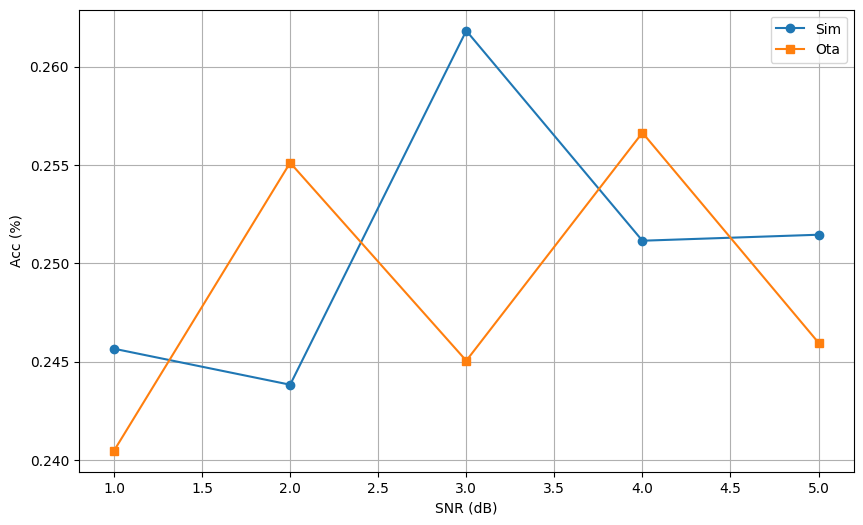

In [5]:


x = np.arange(1, 6)

plt.figure(figsize=(10, 6))
plt.plot(x, sim_acc, marker='o', linestyle='-', label='Sim')
plt.plot(x, ota_acc, marker='s', linestyle='-', label='Ota')


plt.xlabel('SNR (dB)')
plt.ylabel('Acc (%)')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# simulated data
X_sim = np.load(file_path + "/sim_X.npy")
Y_sim = np.load(file_path + "/sim_Y.npy")

# over the air data
X_ota = np.load(file_path + "/ota_X.npy")
Y_ota = np.load(file_path + "/ota_Y.npy")

z_val = 10
sim_acc = []
ota_acc = []

for i in range(5):
    source_mask = (Y_sim[:, 1] == z_val+100)
    X_s = X_sim[source_mask]
    Y_s = Y_sim[source_mask]
    Y_s = Y_s[:,0]

    source_mask = (Y_ota[:, 1] == z_val)
    X_t = X_ota[source_mask]
    Y_t = Y_ota[source_mask]
    Y_t = Y_t[:,0]

    S_train_loader, S_val_loader = funcs.create_loader(X_s, Y_s, permute=False)
    T_train_loader, T_val_loader = funcs.create_loader(X_t, Y_t, permute=False)
 
    print(f'SNR level: {z_val}')
    print('STAR')
    s_base, t_base = star.Star(G=star.CLDNN_G, C=star.CLDNN_C, device=device, S_train_loader=S_train_loader, S_val_loader=S_val_loader,  
                   T_train_loader=T_train_loader, T_val_loader=T_val_loader, class_subset=class_subset,
                   n_classes=len(class_subset), lr=0.005, n_epochs=50, n_runs=5, patience=5).run()
    torch.cuda.empty_cache()
    sim_acc.append(s_base)
    ota_acc.append(t_base)

    z_val += 2
    


SNR level: 10
STAR

Run 1/5
Epoch [1/50], Class Loss: 8.7071, Discrepancy Loss: 0.1193
Epoch [2/50], Class Loss: 1.7125, Discrepancy Loss: 0.1209
Epoch [3/50], Class Loss: 1.4527, Discrepancy Loss: 0.0725
Epoch [4/50], Class Loss: 1.4234, Discrepancy Loss: 0.0651
Epoch [5/50], Class Loss: 1.4251, Discrepancy Loss: 0.0638
Epoch [6/50], Class Loss: 1.4232, Discrepancy Loss: 0.0669
Epoch [7/50], Class Loss: 1.1483, Discrepancy Loss: 0.0899
Epoch [8/50], Class Loss: 0.8980, Discrepancy Loss: 0.1102
Epoch [9/50], Class Loss: 0.8552, Discrepancy Loss: 0.1245
Epoch [10/50], Class Loss: 0.8327, Discrepancy Loss: 0.1381
Epoch [11/50], Class Loss: 0.7800, Discrepancy Loss: 0.1468
Epoch [12/50], Class Loss: 0.5863, Discrepancy Loss: 0.1519
Epoch [13/50], Class Loss: 0.5198, Discrepancy Loss: 0.1401
Epoch [14/50], Class Loss: 0.4877, Discrepancy Loss: 0.1436
Epoch [15/50], Class Loss: 0.4620, Discrepancy Loss: 0.1424
Epoch [16/50], Class Loss: 0.4437, Discrepancy Loss: 0.1374
Epoch [17/50], Class 

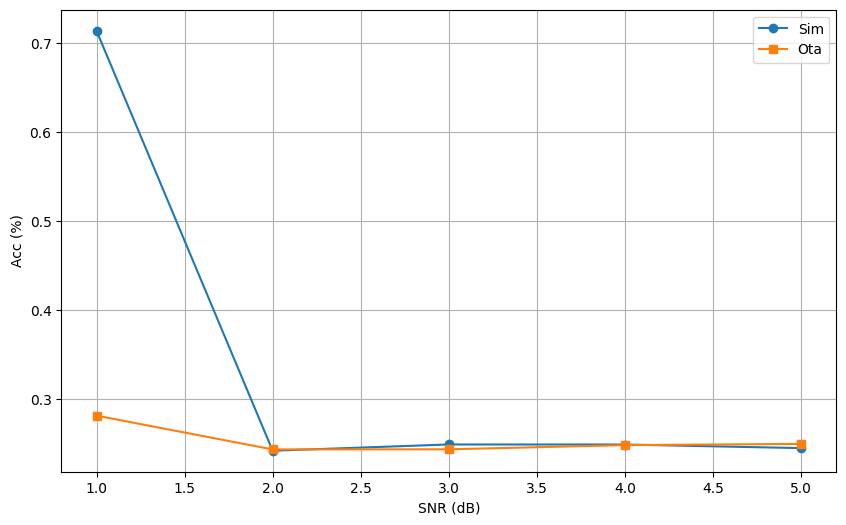

In [7]:


x = np.arange(1, 6)

plt.figure(figsize=(10, 6))
plt.plot(x, sim_acc, marker='o', linestyle='-', label='Sim')
plt.plot(x, ota_acc, marker='s', linestyle='-', label='Ota')


plt.xlabel('SNR (dB)')
plt.ylabel('Acc (%)')
plt.legend()
plt.grid(True)
plt.show()